# Annotation mapping using moscot 

### Import packages

In [1]:
!pip install -U "jax[cuda12_pip]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html


In [2]:
import warnings

from tqdm import TqdmWarning

warnings.filterwarnings("ignore", category=TqdmWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

import moscot as mt
#from moscot import datasets
from moscot.problems.space import MappingProblem

import numpy as np
import seaborn as sns
import scanpy as sc
import squidpy as sq

### Data sets

In [3]:
adata_sc = sc.read('../../../spatial_pancreas_data/preprocessed_data/dissociated_nd_annotation_l0.h5ad')
adata_s1 = sc.read('../../../../../datasets/projects/20230301_Sander_SpatialPancreas_sara.jimenez/spatial/S1.h5ad')

adata_sc, adata_s1

(AnnData object with n_obs × n_vars = 21453 × 23146
     obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'S_score', 'G2M_score', 'phase', 'cell_type_coarse'
     var: 'n_cells'
     uns: 'Sample_colors', 'cell_type_coarse_colors', 'cell_type_coarse_sizes', 'dendrogram_cell_type_coarse', 'leiden', 'log1p', 'neighbors', 'paga', 'phase_colors'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts', 'soupX_counts'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 108711 × 979
     obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK

Subsampling to consider only Non-Diabetic slides (ND)

In [4]:
adata_sp = adata_s1[np.isin(adata_s1.obs['condition'],['ND'])].copy()
adata_sp

AnnData object with n_obs × n_vars = 61460 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes'
    var: 'NegPrb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p', 'spatial'
    obsm: 'spatial', 'spatial_fov'
    layers: 'counts'

### Preprocess data

In [5]:
sc.pp.highly_variable_genes(
    adata_sc,
    n_top_genes=2000,
    subset=True,
    layer='counts',
    #flavor='seurat_v3',
)
adata_sc

AnnData object with n_obs × n_vars = 21453 × 2000
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'S_score', 'G2M_score', 'phase', 'cell_type_coarse'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Sample_colors', 'cell_type_coarse_colors', 'cell_type_coarse_sizes', 'dendrogram_cell_type_coarse', 'leiden', 'log1p', 'neighbors', 'paga', 'phase_colors', 'hvg'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts', 'soupX_counts'
    obsp: 'connectivities', 'distances'

In [6]:
sc.pp.subsample(adata_sc,fraction=0.25)
adata_sc

AnnData object with n_obs × n_vars = 5363 × 2000
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'S_score', 'G2M_score', 'phase', 'cell_type_coarse'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Sample_colors', 'cell_type_coarse_colors', 'cell_type_coarse_sizes', 'dendrogram_cell_type_coarse', 'leiden', 'log1p', 'neighbors', 'paga', 'phase_colors', 'hvg'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts', 'soupX_counts'
    obsp: 'connectivities', 'distances'

Subset to a field of view to test the mapping problem 

In [7]:
adata_sp_fov_12 = adata_sp[np.isin(adata_sp.obs['fov'],['12'])].copy()
adata_sp_fov_12

AnnData object with n_obs × n_vars = 5208 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes'
    var: 'NegPrb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p', 'spatial'
    obsm: 'spatial', 'spatial_fov'
    layers: 'counts'

In [8]:
sc.pp.pca(adata_sp_fov_12)
sc.pp.neighbors(adata_sp_fov_12)
sc.tl.umap(adata_sp_fov_12)

Normalization to avoid technical artifacts (has to be per fov)

In [9]:
spatial = adata_sp_fov_12.obsm['spatial']
adata_sp_fov_12.obsm['spatial_norm'] = spatial - spatial.mean() / spatial.std()

adata_sp_fov_12.obsm['PCA_spatial'] = np.concatenate([adata_sp_fov_12.obsm['spatial_norm'], adata_sp_fov_12.obsm['X_pca']], axis = 1)

In [ ]:
sc.pp.subsample(adata_sp_fov_12,fraction=0.5)
adata_sp_fov_12

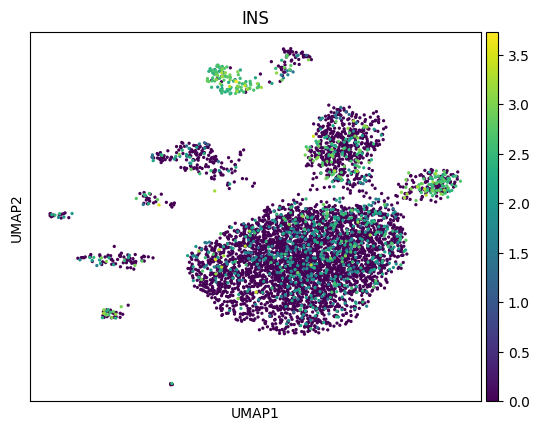

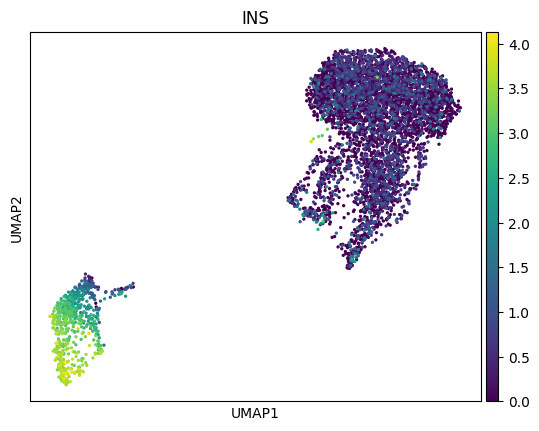

In [10]:
sc.pl.umap(adata_sc, color='INS')
sc.pl.umap(adata_sp_fov_12, color='INS')

### Preprare and solve the mapping problem 

In [11]:
mp = MappingProblem(adata_sc=adata_sc, adata_sp=adata_sp_fov_12)

In [12]:
mp = mp.prepare(
    sc_attr = {'attr': 'obsm', 'key': 'X_pca'}, 
    kwargs = {'callback_kwargs': 'local_pca'},
    spatial_key = {'attr': 'obsm', 'key': 'PCA_spatial'},
    cost = 'sq_euclidean', # 'cosine'
    joint_attr = 'X_pca' # X
)

INFO     Normalizing spatial coordinates of `x`.                                                                   


In [13]:
# Intervals suggested by Giovanni 
# tau_a, tau_b = 1, 0.999, 0.995, 0.990, 0.900
# epsilon = 0.05, 0.1
# alpha = 0.2,0.3
# max_iterations = > 5k
params = {'epsilon': 0.1, 'alpha': 0.2, 'rank':-10, 'tau_a':0.9, 'tau_b':1}
epsilon, alpha, rank, tau_a, tau_b = params['epsilon'], params['alpha'], params['rank'], params['tau_a'], params['tau_b']

In [14]:
mp = mp.solve(
    alpha=alpha,
    epsilon=epsilon,
    #rank=rank,
    #threshold=1e-10,
    #max_iterations=5e3,
    tau_a=tau_a,
    tau_b=tau_b,
)

INFO     Solving `1` problems                                                                                      
INFO     Solving problem OTProblem[stage='prepared', shape=(5208, 5363)].                                          


2024-04-23 12:20:39.005414: W external/xla/xla/service/gpu/nvptx_compiler.cc:718] The NVIDIA driver's CUDA version is 12.3 which is older than the ptxas CUDA version (12.4.131). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [15]:
mp

MappingProblem[('src', 'tgt')]

### Analysis of the transport plan

#### Imputation

In [ ]:
import pandas as pd
genes = pd.read_csv('../../../spatial_pancreas_data/preprocessed_data/genes2impute.txt', delimiter='\t', header=None)
list(genes[0])

In [16]:
genes = ['ARX','ISL1','INS','GCG','SST']

In [17]:
#adata_imputed = mp.impute(var_names=list(genes[0]))
adata_imputed = mp.impute(var_names=genes)
adata_imputed.uns['spatial'] = adata_sp_fov_12.uns['spatial']
adata_imputed.obs['fov'] = adata_sp_fov_12.obs['fov']
adata_imputed.obs['cell_ID'] = adata_sp_fov_12.obs['cell_ID']   

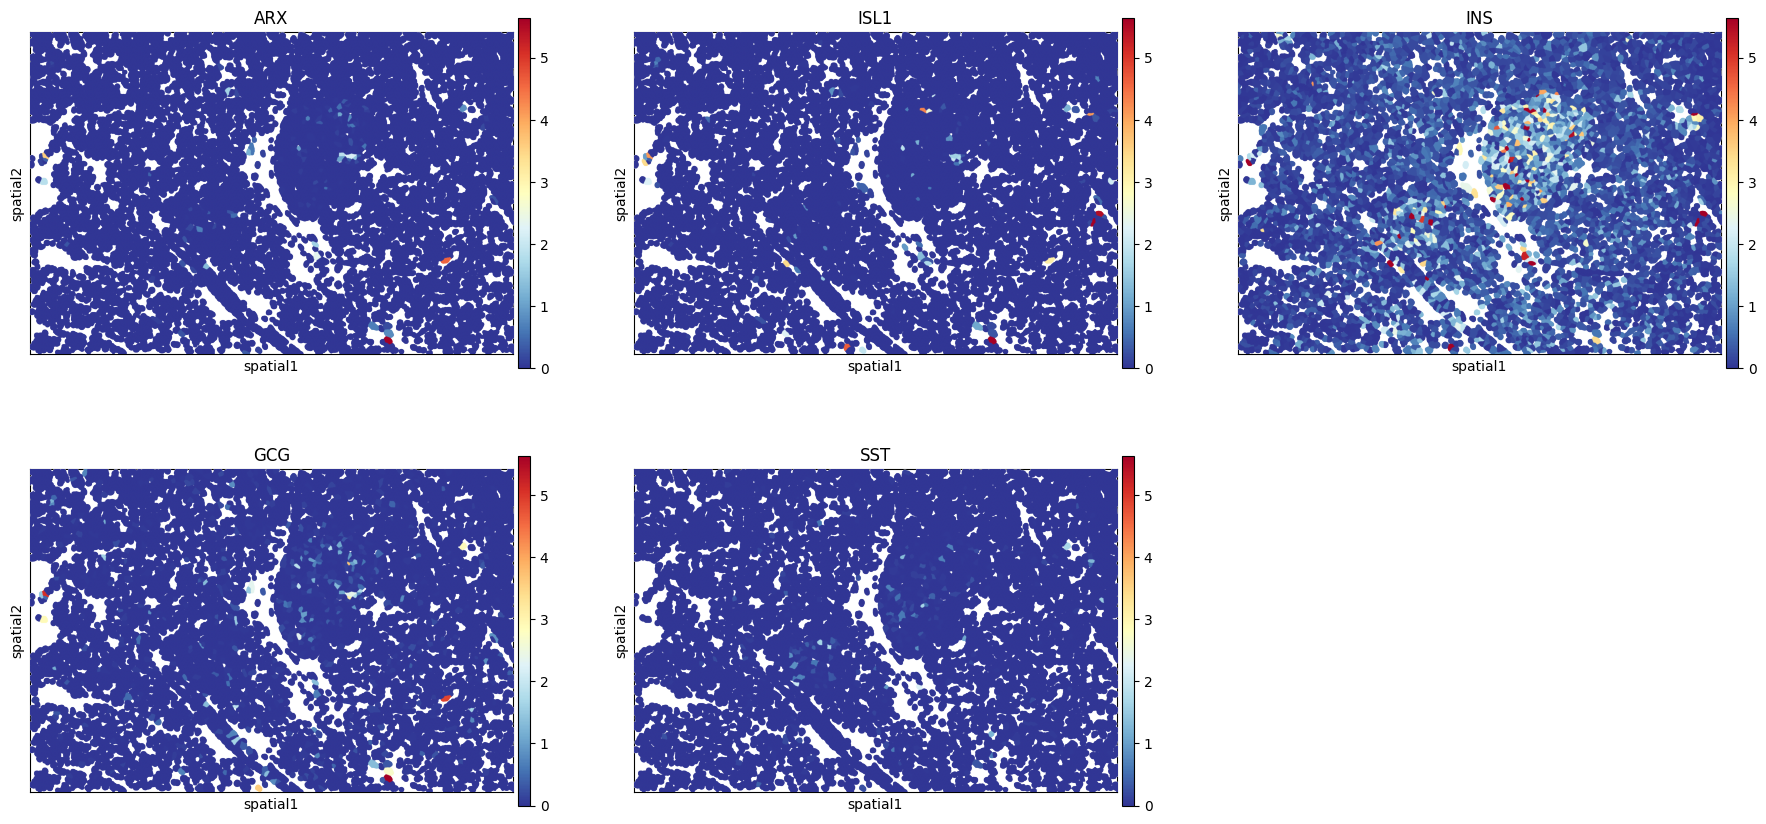

In [18]:
sq.pl.spatial_segment(adata_imputed,color=genes,ncols=3,
                      library_key='fov', seg_cell_id='cell_ID',cmap='RdYlBu_r', img=False)

In [ ]:
sq.pl.spatial_segment(adata_sp_fov_12,color=['INS','GCG','SST'],ncols=3,
                      library_key='fov', seg_cell_id='cell_ID',cmap='RdYlBu_r', img=False)

#### Annotation mapping

In [19]:
mp[("src", "tgt")]

OTProblem[stage='solved', shape=(5208, 5363)]

In [20]:
type(adata_sc.obs.cell_type_coarse)

pandas.core.series.Series

In [21]:
adata_sc.obs.cell_type_coarse = adata_sc.obs.cell_type_coarse.astype("category")

In [ ]:
import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"]="false"
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]=".XX"
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"]="platform"

In [22]:
anno_map_max = mp.annotation_mapping(
    "max",
    "cell_type_coarse",
    source="src",
    #target="tgt",
    forward=False,
    batch_size=64,
)

In [23]:
adata_sp_fov_12.obs["cell_type_coarse_max"] = anno_map_max["cell_type_coarse"].values
adata_sp_fov_12.obs["cell_type_coarse_max"] = adata_sp_fov_12.obs["cell_type_coarse_max"].astype("category")

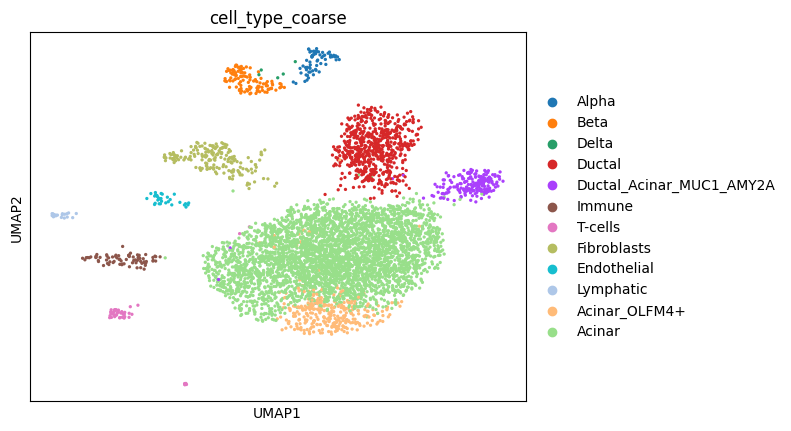

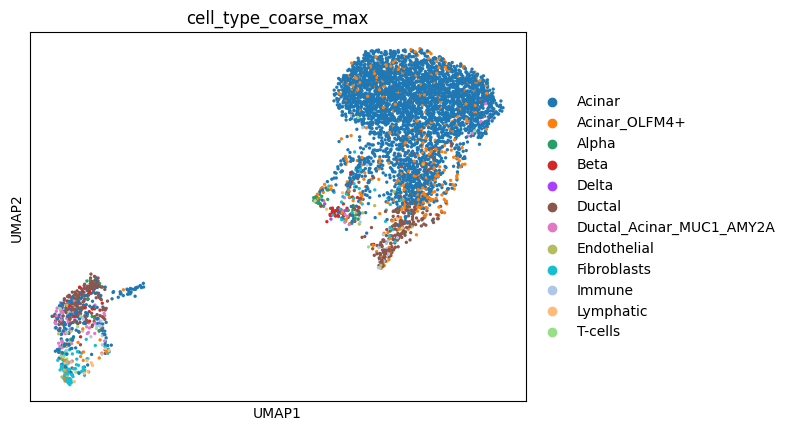

In [24]:
sc.pl.umap(adata_sc, color="cell_type_coarse")
sc.pl.umap(adata_sp_fov_12, color=["cell_type_coarse_max"])

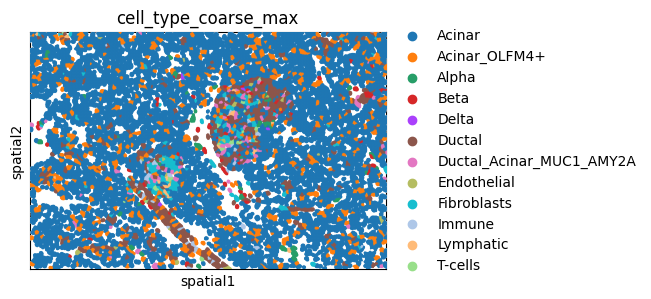

In [25]:
sq.pl.spatial_segment(adata_sp_fov_12,color='cell_type_coarse_max',size=5,
                      library_key='fov', seg_cell_id='cell_ID',cmap='RdYlBu_r', img=False)